### Project: Question-Answering System on Private Documents Using OpenAI, Pinecone and LangChain

#### Project Pipeline:- 

1. Prepare the Document (once per document)
    
    a. Load the data into LangChain Documents.
    
    b. Spilt the documents into Chunks.
    
    c. Embed the chunks into numeric vectors.
    
    d. Save the chunks and the embeddings to a vector database.

2. Search (once per query)

    a. Embed the user's question (using the same embedding model API used earlier).

    b. Using the question's embedding and the chunk embeddings, rank the vectors by similarity to the question's embedding. The nearest vectors represent chunks similar to the question.

3. Ask (once per query)

    a. Insert the question and the most relevant chunks into a message to a GPT Model.

    b. Return GPT's answer.

------------------------------------------------------------------------------------

#### Project Demo

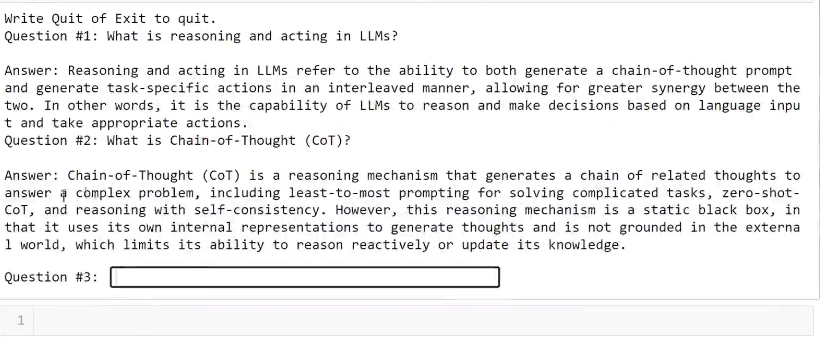

#### Loading Custom (Private) PDF Documents using `LangChain Document Loader`. These Document loaders transform data from a specific format into the LangChain Document format.

In [27]:
# Load the ENV File
import os
from dotenv import find_dotenv, load_dotenv
load_dotenv(find_dotenv(), override=True)
print("ENV File Loaded")

ENV File Loaded


In [13]:
def load_document(file:str):
    """Function will take PDF file as an argument and return text content.
    file: PDF File
    """
    from langchain.document_loaders import PyPDFLoader

    print(f"Loading '{file}'")
    loader = PyPDFLoader(file_path=file)
    data = loader.load() # This will return a list of Langchain Documents, one document for each page
    return data

#### Running/Testing Code

In [18]:
# Loading Local PDF File
data = load_document(file="us_constitution.pdf")
# print(data[1].page_content) # It's the 2nd page of the PDF, as the indexing starts from 0
# print(data[1].metadata)

# Loading PDF File Through URL
# data = load_document(file="paste the URL here")

print(f"You have {len(data)} pages in your data")
print(f"There are {len(data[1].page_content)} characters in the page")

Loading 'us_constitution.pdf'
You have 41 pages in your data
There are 1500 characters in the page


#### Loading Different Document Formats

In [4]:
def load_document(file: str):
    """
    This function is checks the File Type (like is it pdf, excel, docs, csv, etc.) and returns the textual data using Langchain Document loader.
    """
    import os

    # Splitting the file name and extension
    name, extension = os.path.splitext(file)
    print(f"The Extension for this file {name} is tracked: {extension}")

    # For .pdf extension file type
    if extension == ".pdf":
        from langchain.document_loaders import PyPDFLoader

        loader = PyPDFLoader(file)
        print(f"\nYour File {name} is loaded, detected extension {extension}")

    # For .pdf extension file type
    elif extension == ".docx" or ".doc":
        from langchain.document_loaders import Docx2txtLoader

        loader = Docx2txtLoader(file)
        print(f"\nYour File {name} is loaded, extension detected is {extension}")

    # For .csv extension file type
    elif extension == ".csv":
        from langchain.document_loaders import CSVLoader

        loader = CSVLoader(file)
        print(f"\nYour File {name} is loaded, detected extension is {extension}")
    
    #elifs for more extension support

    else:
        raise FileNotFoundError(
            f"{file} doesn't exists or not supported, recheck your file"
        )

    data = loader.load()
    return data

In [ ]:
## Testing .pdf file extension
data = load_document("indian_constitution.pdf")
print("\nFile loaded successfully")

print(f"Textual Content of Page 2: {data[1].page_content}") # 2nd Page Textual Data Content
print(f"\nTotal Pages in the document {len(data)}")

The Extension for this file indian_constitution is tracked: .pdf

Your File indian_constitution is loaded, detected extension .pdf

File loaded successfully
Textual Content of Page 2: PREFACEThis is the  sixth pocket size edition of the Constitution of India in the diglot form. In this edition, the text of the Constitution of India has been brought up-to-date by incorporating therein all the amendments up to the Constitution (One Hundred and Sixth Amendment) Act, 2023. The foot notes below the text indicate the Constitution Amendment Acts by which such amendments have been made. The Constitution (One Hundredth Amendment) Act, 2015 containing details of acquired and transferred territories between the Governments of India and Bangladesh has been provided in Appendix I.The Constitution (Application to Jammu and Kashmir) Order, 2019 and the declaration under article 370(3) of the Constitution have been provided respectively in Appendix II and Appendix III for reference.New Delhi;Dr. Rajiv

In [ ]:
## Testing the .docx file type
data = load_document("files/the_great_gatsby.docx")
print(f"Text Content of data: {data[0].page_content}")

The Extension for this file files/the_great_gatsby is tracked: .docx

Your File files/the_great_gatsby is loaded, extension detected is .docx
Page 2 Content: The Project Gutenberg eBook of The Great Gatsby, by F. Scott Fitzgerald



This eBook is for the use of anyone anywhere in the United States and

most other parts of the world at no cost and with almost no restrictions

whatsoever. You may copy it, give it away or re-use it under the terms

of the Project Gutenberg License included with this eBook or online at

www.gutenberg.org. If you are not located in the United States, you

will have to check the laws of the country where you are located before

using this eBook.



Title: The Great Gatsby



Author: F. Scott Fitzgerald



Release Date: January 17, 2021 [eBook #64317]

[Most recently updated: January 24 2021]



Language: English





Produced by: Alex Cabal for the Standard Ebooks project, based on a

             transcription produced for Project Gutenberg Australia.



**

### Public and Private Service Loaders

- Loading Data from Online Services Into Langchain

In [2]:
## Wikipedia


def load_from_wikipedia(query: str, lang: str = "en", load_max_docs: int = 2):
    """
    Functions takes data from Wikipedia and converts into text data using Langchain document loaders.
    query: free text used to find documents in Wikipedia.
    lang: English (by default)
    """

    from langchain.document_loaders import WikipediaLoader

    loader = WikipediaLoader(query=query, lang=lang, load_max_docs=load_max_docs)
    data = loader.load()
    return data

In [45]:
data = load_from_wikipedia(query="GPT-5", lang="en")
print(data[0].page_content)

GPT-5 is a multimodal large language model developed by OpenAI and the fifth in its series of generative pre-trained transformer (GPT) foundation models. Preceded in the series by GPT-4, it was launched on August 7, 2025, combining reasoning capabilities and non-reasoning functionality under a common interface. At its time of release, GPT-5 had state-of-the-art performance on various benchmarks. The model is publicly accessible to users of the chatbot products ChatGPT and Microsoft Copilot as well as to developers through the OpenAI API.


== Background ==

On April 14, 2023, Sam Altman, the chief executive officer of OpenAI, spoke at an event at the Massachusetts Institute of Technology and said that the company was not training GPT-5 at that time. He stated that OpenAI was "prioritizing GPT-4 development" and that "we are not and won't for some time" release GPT-5.
On July 18, OpenAI filed for a "GPT-5" trademark in the United States. On November 13, Altman confirmed to the Financial

In [44]:
# Fetching results in German Language
data = load_from_wikipedia(query="GPT-5", lang="de")
print(data[0].page_content)

OpenAI, Inc. ist ein US-amerikanisches nicht-börsennotiertes Softwareunternehmen, das sich seit Ende 2015 mit der Erforschung von künstlicher Intelligenz (KI, englisch Artificial Intelligence, AI) beschäftigt. Anfänglich war das Ziel von OpenAI, künstliche Intelligenz auf Open-Source-Basis zu entwickeln. Das Unternehmen wurde vorerst als Non-Profit geführt. 2019 wurde die gewinnorientierte Tochtergesellschaft OpenAI Global, LLC gegründet, in der Microsoft größter Investor ist. OpenAI ist vor allem bekannt für die Entwicklung der generativen vortrainierten Transformer (GPT) – auch generative künstliche Intelligenz, kurz GenAI, bezeichnet – und der daraus abgeleiteten Softwareprodukte wie ChatGPT oder DALL-E.


== Geschichte ==


=== Gründungsphase und Mission ===
Der Gründung von OpenAI im Jahr 2015 ging bereits eine lange Debatte um die Risiken von KI voraus. Die Wissenschaftler Stephen Hawking und Stuart Jonathan Russell etwa hatten Befürchtungen geäußert, wenn künstliche Intelligenz 

#### Chunking Strategies and Splitting the Documents

- Chunking is the process of breaking down large pieces of text into smaller segments.

In [ ]:
def chunk_data(data, chunk_size: int = 256):
    from langchain.text_splitter import RecursiveCharacterTextSplitter

    text_splitter = RecursiveCharacterTextSplitter(
        chunk_size=chunk_size, chunk_overlap=0
    )
    chunks = text_splitter.split_documents(data)
    return chunks

In [7]:
## Test the above functions
data = load_document("files/us_constitution.pdf")
print(f"You have total {len(data)} pages in your data.")
print(f"\nThere are total {len(data[20].page_content)} characters on page 21")

The Extension for this file files/us_constitution is tracked: .pdf

Your File files/us_constitution is loaded, detected extension .pdf
You have total 41 pages in your data.

There are total 1173 characters on page 21


In [11]:
chunks = chunk_data(data=data)
print(f"{len(chunks)}")
print(f"\n{chunks[10].page_content}")

224

Maryland six, V irginia ten, North Carolina five, South Carolina five, and 
 Georgia three. 
 When vacancies happen in the Representation from any State, the 
 Executive Authority thereof shall issue W rits of Election to fill such 
 V acancies.


In [25]:
# Checking the Costing for Embedding using TikToken - OpenAI's Embedding Model


def print_embedding_cost(texts):
    import tiktoken

    # Checking for OpenAI Embedding Models - "text-embedding-ada-002"
    enc_1 = tiktoken.encoding_for_model("text-embedding-ada-002")
    total_tokens_1 = sum([len(enc_1.encode(page.page_content)) for page in texts])
    print(f"Total Tokens as per enc_1: {total_tokens_1}")
    per_token_cost_1 = 0.10 / 1_000_000
    embedding_cost_USD_enc_1 = per_token_cost_1 * total_tokens_1
    print(
        f"Total Cost Estimation for embedding using 'text-embedding-ada-002' will be: ${embedding_cost_USD_enc_1:.6f}"
    )

    # Checking for OpenAI Embedding Models - "text-embedding-3-small"
    enc_2 = tiktoken.encoding_for_model("text-embedding-3-small")
    total_tokens_2 = sum([len(enc_2.encode(page.page_content)) for page in texts])
    print(f"\nTotal Tokens as per enc_2: {total_tokens_2}")
    per_token_cost_2 = 0.02 / 1_000_000
    embedding_cost_USD_enc_2 = per_token_cost_2 * total_tokens_2
    print(
        f"Total Cost Estimation for embedding using 'text-embedding-3-small' will be: ${embedding_cost_USD_enc_2:.6f}"
    )

    # Checking for OpenAI Embedding Models - "text-embedding-3-large"
    enc_3 = tiktoken.encoding_for_model("text-embedding-3-large")
    total_tokens_3 = sum([len(enc_3.encode(page.page_content)) for page in texts])
    print(f"\nTotal Tokens as per enc_2: {total_tokens_3}")
    per_token_cost_3 = 0.13 / 1_000_000
    embedding_cost_USD_enc_3 = per_token_cost_3 * total_tokens_3
    print(
        f"Total Cost Estimation for embedding using 'text-embedding-3-large' will be: ${embedding_cost_USD_enc_3:.6f}"
    )

In [26]:
print_embedding_cost(chunks)

Total Tokens as per enc_1: 9842
Total Cost Estimation for embedding using 'text-embedding-ada-002' will be: $0.000984

Total Tokens as per enc_2: 9842
Total Cost Estimation for embedding using 'text-embedding-3-small' will be: $0.000197

Total Tokens as per enc_2: 9842
Total Cost Estimation for embedding using 'text-embedding-3-large' will be: $0.001279


## Vector Databases - Authenticating to Pinecone

In [ ]:
from pinecone import Pinecone

api_key = os.environ.get("PINECONE_API_KEY")

pc = Pinecone(api_key=api_key)
if pc:
    print("API Key loaded successfully")
    # To check for authentication
    pc.list_indexes() 

    # To check all the indexes created
    # pc.list_indexes().names()

else:
    raise KeyError("Check for your API key")

API Key loaded successfully


[]

Working with Pinecone Indexes

In [43]:
# Create a new index 

from pinecone import ServerlessSpec
index_name = "langchain"

if index_name not in pc.list_indexes().names():
    print(f"Creating Index: {index_name}")
    pc.create_index(
        name=index_name,
        dimension=1536,
        metric="cosine",
        spec=ServerlessSpec(
            cloud="aws",
            region="us-east-1" # Pinecone does not currently support an India-based region, region="us-east-1"
        )
    )
    print("Index Created! :)")

else:
    print(f"Index: {index_name} already exists")

Creating Index: langchain
Index Created! :)
